# <center><font color='navy'>Mammal Image Classification using Convolutional Neural Network

### Objective:
> To develop an exceptional Convolutional Neural Network model that confidently classifies Mammal Images using cutting-edge transfer learning techniques, ensuring the highest level of accuracy and reliability.

### Data Collection:
+ Downloaded the collection of images from Kaggle Platform.

In [1]:
#imported necessary modules for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.applications import EfficientNetB4
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
import os
import scipy
from glob import glob

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#verifying accessibility of GPU by tensorflow
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
      raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
#configuring tensorflow to utilize GPU of the system
physical_device=tf.config.list_physical_devices('GPU')
physical_device[0].name

'/physical_device:GPU:0'

In [5]:
# To split the image folder into train,val,test

#splitfolders.ratio('./mammal_images/mammals') 

In [11]:
#defining the path variables for train data, test data and validation data
train_path='./output/train'
val_path='./output/val'
test_path='./output/test'

In [12]:
#storing the image folder names into a list
folder_list=os.listdir(train_path)
folder_length=len(folder_list)

In [13]:
#creating a label dictionary of mammal names
folder_dict=dict(zip(range(folder_length),folder_list))
folder_dict

{0: 'african_elephant',
 1: 'alpaca',
 2: 'american_bison',
 3: 'anteater',
 4: 'arctic_fox',
 5: 'armadillo',
 6: 'baboon',
 7: 'badger',
 8: 'blue_whale',
 9: 'brown_bear',
 10: 'camel',
 11: 'dolphin',
 12: 'giraffe',
 13: 'groundhog',
 14: 'highland_cattle',
 15: 'horse',
 16: 'jackal',
 17: 'kangaroo',
 18: 'koala',
 19: 'manatee',
 20: 'mongoose',
 21: 'mountain_goat',
 22: 'opossum',
 23: 'orangutan',
 24: 'otter',
 25: 'polar_bear',
 26: 'porcupine',
 27: 'red_panda',
 28: 'rhinoceros',
 29: 'seal',
 30: 'sea_lion',
 31: 'snow_leopard',
 32: 'squirrel',
 33: 'sugar_glider',
 34: 'tapir',
 35: 'vampire_bat',
 36: 'vicuna',
 37: 'walrus',
 38: 'warthog',
 39: 'water_buffalo',
 40: 'weasel',
 41: 'wildebeest',
 42: 'wombat',
 43: 'yak',
 44: 'zebra'}

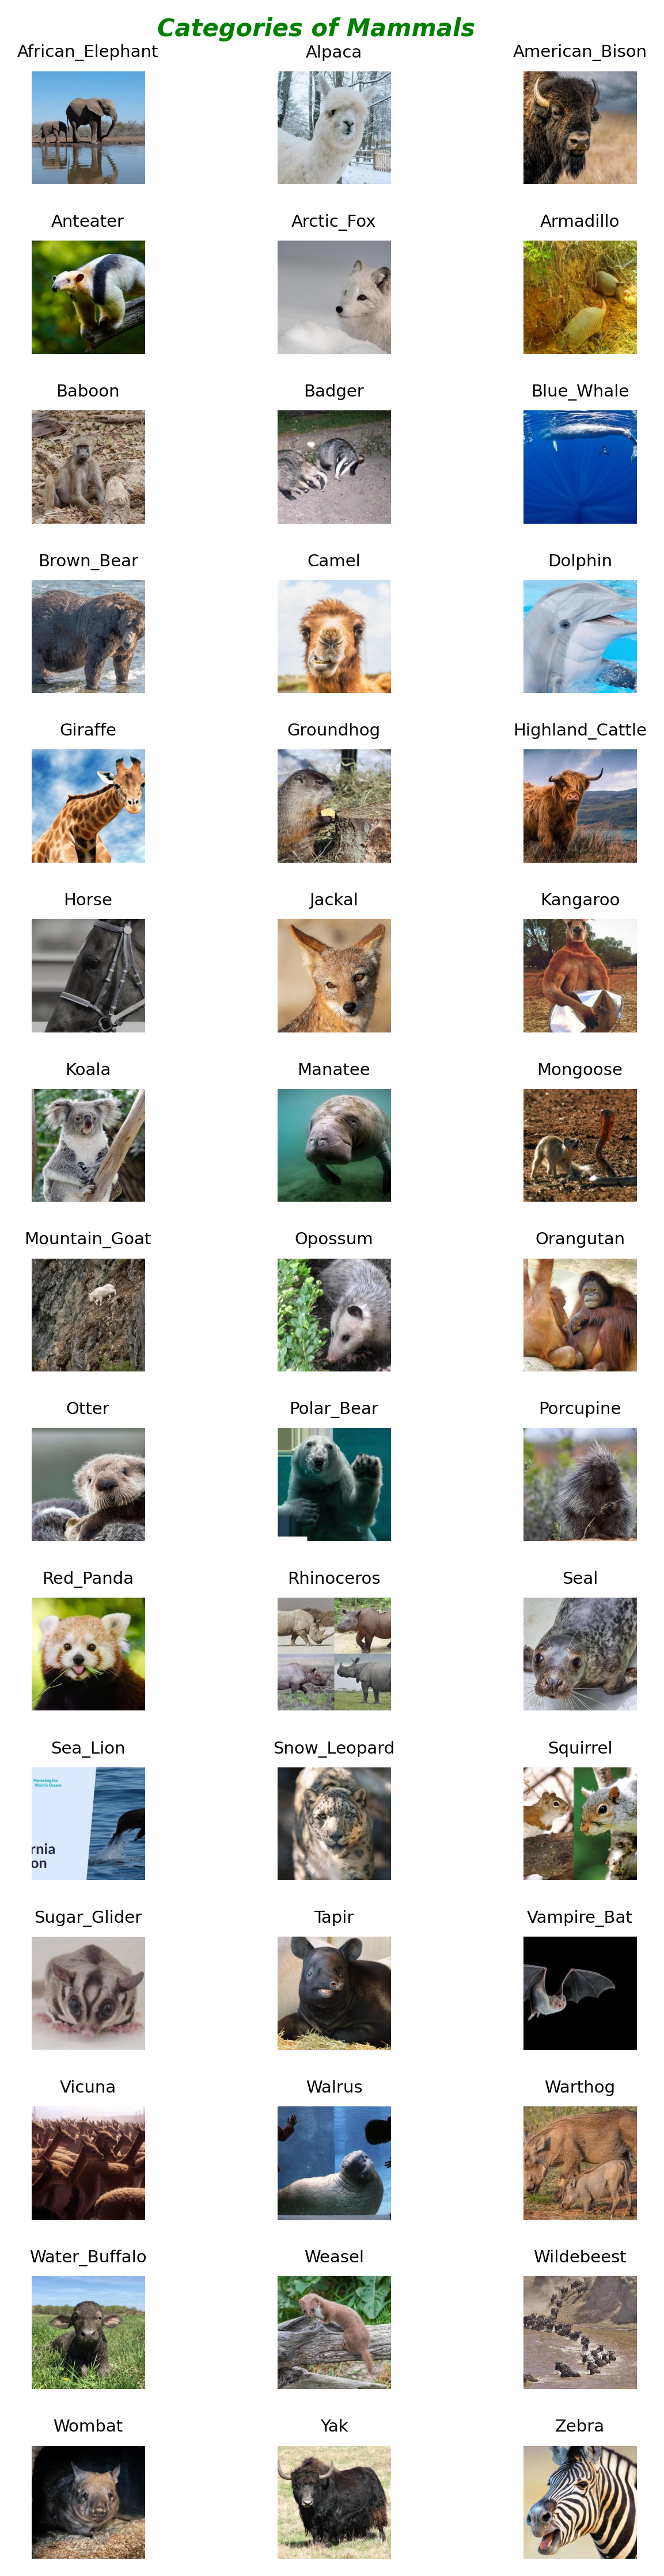

In [9]:
#plotting sample images from categories of mammals images in the training folders
def plot_images(image_num,figure_height,figure_width):
    fig,ax=plt.subplots(folder_length//3,3,figsize=(8,8),dpi=300)
    fig.set_figheight(figure_height)
    fig.set_figwidth(figure_width)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.5,wspace=0)
    idx=0
    for row in range(15):
        for col in range(3):
            plt.suptitle('Categories of Mammals',y=1,va='baseline',fontsize=10,color='green',fontweight='bold',fontstyle='italic')
            image_array=cv2.imread(glob(train_path+'/'+folder_list[idx]+'/'+folder_list[idx]+'*.jpg')[image_num])
            image_array=cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB)
            ax[row,col].imshow(image_array)
            ax[row,col].axis('off')
            ax[row,col].set_title(folder_list[idx].title(),fontsize=7)
            idx+=1
plot_images(0,15,5)

In [10]:
#creating a generator to pass a set of images to the model
train_generator=tf.keras.utils.image_dataset_from_directory(
    directory=train_path,image_size=(224,224),batch_size=32,shuffle=True,seed=100
)

val_generator=tf.keras.utils.image_dataset_from_directory(
    directory=val_path,image_size=(224,224),batch_size=32,shuffle=True,seed=100
)

Found 10986 files belonging to 45 classes.
Found 1355 files belonging to 45 classes.


In [6]:
test_generator=tf.keras.utils.image_dataset_from_directory(
    directory=val_path,image_size=(224,224),batch_size=1,shuffle=True,seed=100
)

Found 1355 files belonging to 45 classes.


### What is Transfer Learning?

> **Transfer Learning is a machine learning technique where a pre-trained model, developed on a specific task, is repurposed for a new, related task. By leveraging the knowledge gained from the initial task, accelerates and enhances the learning process for the new task, particularly in scenarios with limited labelled data.**
+ Transfer Learning techniques are widely used in Computer Vision and Natural Language Processing. The main reasons are:
  - **Limited system resources:**
      - Training deep CNN models from scratch demands substantial computational resources and time. Transfer learning allows leveraging pre-existing knowledge, saving resources and expediting the model training process, making it more feasible for practical applications.
  - **Limited Data Availability:**
      - Transfer learning is crucial in CNN models when labelled data are scarce for a specific task. Pre-trained models, having learned from extensive datasets on related tasks, can effectively generalize to new tasks with fewer labelled examples.
  - **Feature Extraction and Representation Learning:**
      - Pre-trained CNNs excel at learning hierarchical features and representations from diverse data. Transfer learning enables the reuse of these learned features for new tasks, facilitating better generalization and improved performance, especially in image classification or object detection tasks.

In [8]:
#loading a pre-trained model from Keras API
base_model=EfficientNetB4(include_top=False,input_shape=(224,224,3))

- In the above code we have set the `include_top` parameter to False. Because we only interested in the weights and bias values between the first hidden layer and last hidden layer. Include_top will remove the last layer from model Architecture which can tailor this base model by modifying the last layer to our need as per our output layer requirement.

In [9]:
#setting base model trainable to false
base_model.trainable=False

- In the above code, we have set `trainable attribute` to False. This is an important step in utilizing the pre-trained models. The reason is if we do not set this variable to false, the base model will be trained again. We do not want this to happen and we need the weights and bias from those layers. So that we are setting this attribute to false.

In [14]:
#viewing the summary of base model structure
base_model.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

**Data Augmentation:**
Data augmentation in image classification involves applying various transformations to the existing dataset, such as rotation, scaling, and flipping, to artificially increase its size. This technique enhances model robustness and generalization by exposing it to a broader range of variations within the data.

**Reasons for Data Augmentation:**
1. **Increased Dataset Size:**
   Augmenting data expands the training dataset, mitigating the risk of overfitting and enhancing the model's ability to generalize to unseen variations in real-world scenarios.

2. **Improved Model Robustness:**
   By introducing diverse variations in the training set, data augmentation helps the model become more resilient to changes in lighting, orientation, and other factors commonly encountered in practical applications.

3. **Addressing Class Imbalance:**
   Data augmentation is particularly beneficial when dealing with imbalanced datasets. It provides a balanced representation of different classes by creating synthetic examples for underrepresented classes, ensuring the model's fairness in learning each class. each class.

In [14]:
#creating a sequential model
final_model=Sequential()
final_model.add(InputLayer(input_shape=(224,224,3)))
#adding random rotation, random-flip and random zoom layers
final_model.add(RandomRotation(0.2))
final_model.add(RandomFlip())
final_model.add(RandomZoom(0.1))
#adding deep neural network layers and integrating it with base model
final_model.add(base_model)
final_model.add(GlobalAveragePooling2D())
final_model.add(Flatten())
final_model.add(Dense(128,activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(folder_length,activation='softmax'))

- In the above step, we have performed some data augmentation techniques such as random rotation, random flip and random zoom to add variations to the images that are being trained. It will reduce the model overfitting to the train data.

In [15]:
#compiling the layers to build the final model architecture
final_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 efficientnetb4 (Functional)  (None, 7, 7, 1792)       17673823  
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1792)              0

In [17]:
#setting early stopping to stop the training if the loss is not reduced and checkpoints to save the best model from training
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True,mode='min')

In [18]:
# Create a TensorFlow session with limited GPU memory usage
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
session = tf.compat.v1.Session(config=config)

# Set the session as the default session for subsequent operations
tf.compat.v1.keras.backend.set_session(session)

In [19]:
with tf.device(tf.test.gpu_device_name()):
    final_model.fit(train_generator,
                                  validation_data=val_generator, epochs=40,callbacks=[es])

Epoch 1/40
344/344 [==============================] - 252s 653ms/step - loss: 1.2041 - accuracy: 0.7082 - val_loss: 0.2194 - val_accuracy: 0.9417
Epoch 2/40
344/344 [==============================] - 215s 625ms/step - loss: 0.6026 - accuracy: 0.8257 - val_loss: 0.1872 - val_accuracy: 0.9439
Epoch 3/40
344/344 [==============================] - 220s 640ms/step - loss: 0.5226 - accuracy: 0.8491 - val_loss: 0.1677 - val_accuracy: 0.9506
Epoch 4/40
344/344 [==============================] - 218s 632ms/step - loss: 0.4751 - accuracy: 0.8629 - val_loss: 0.1664 - val_accuracy: 0.9491
Epoch 5/40
344/344 [==============================] - 218s 632ms/step - loss: 0.4328 - accuracy: 0.8710 - val_loss: 0.1597 - val_accuracy: 0.9565
Epoch 6/40
344/344 [==============================] - 218s 632ms/step - loss: 0.4161 - accuracy: 0.8754 - val_loss: 0.1550 - val_accuracy: 0.9572
Epoch 7/40
344/344 [==============================] - 217s 631ms/step - loss: 0.3898 - accuracy: 0.8804 - val_loss: 0.1575 -

In [20]:
df=pd.DataFrame(final_model.history.history)

In [21]:
df

loss  accuracy  val_loss  val_accuracy
0  1.204078  0.708174  0.219374      0.941697
1  0.602587  0.825687  0.187213      0.943911
2  0.522594  0.849081  0.167683      0.950553
3  0.475084  0.862916  0.166373      0.949077
4  0.432838  0.871018  0.159697      0.956458
5  0.416083  0.875387  0.154979      0.957196
6  0.389803  0.880393  0.157472      0.954244
7  0.376391  0.886765  0.163395      0.954244

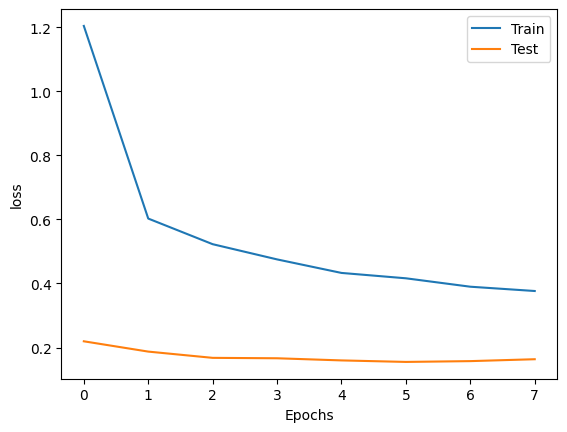

In [22]:
sns.lineplot(x=df.index,y=df['loss'],label='Train')
sns.lineplot(x=df.index,y=df['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.legend()
plt.show()

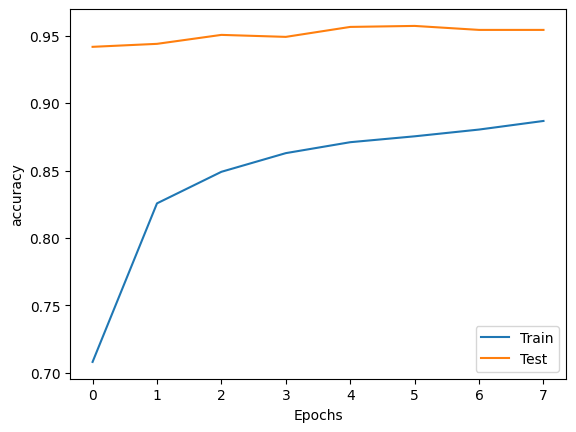

In [23]:
sns.lineplot(x=df.index,y=df['accuracy'],label='Train')
sns.lineplot(x=df.index,y=df['val_accuracy'],label='Test')
plt.xlabel('Epochs')
plt.legend()
plt.show()

1/1 [==============================] - 6s 6s/step
polar_bear


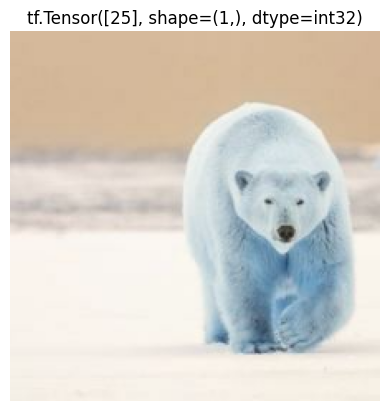

In [24]:
for i in test_generator.take(1):
    i_arr=cv2.cvtColor(np.array(i[0]).reshape(224,224,3).astype('uint8'),cv2.COLOR_BGR2RGB)
    plt.imshow(i_arr)
    plt.title(i[1])
    plt.axis('off')
    print(folder_dict[np.argmax(final_model.predict(i[0],batch_size=1))])

In [26]:
pred_result=final_model.evaluate(test_generator)

1355/1355 [==============================] - 64s 47ms/step - loss: 0.1550 - accuracy: 0.9572


In [27]:
print(f'Prediction Loss: {pred_result[0]:.2f}\nPrediction Accuracy: {pred_result[1]:.2%}')

Prediction Loss: 0.15
Prediction Accuracy: 95.72%


In [30]:
# final_model.save('./final_model/saved_model.h5')

In [22]:
model=tf.keras.models.load_model('./final_model/saved_model.h5')

In [28]:
convertor=tf.lite.TFLiteConverter.from_keras_model(model)
convertor.optimizations=[tf.lite.Optimize.DEFAULT]

In [29]:
tf_lite_model=convertor.convert()

INFO:tensorflow:Assets written to: C:\Users\james\AppData\Roaming\Python\PYTHON~1\SITE-P~1\pip\tmp7ggkl2bd\assets


INFO:tensorflow:Assets written to: C:\Users\james\AppData\Roaming\Python\PYTHON~1\SITE-P~1\pip\tmp7ggkl2bd\assets


In [30]:
with open('tf_lite_model.tflite','wb') as f:
    f.write(tf_lite_model)

### Summary:
- Uploaded images to a directory and organized them into distinct folders for training, validation, and testing.
- Acquired the EfficientNetB4 pre-trained model as the base model using the Tensorflow Keras API.
- Removed the final layer from the prediction model while keeping the hidden layers and their associated weights frozen.
- Applied data augmentation techniques, including random rotation, flipping and zooming as part of the training process to address potential overfitting.
- Compiled and trained the model using the designated training image dataset.
- Assessed the model's performance by caculating metrics for loss and accuracy.
- The model achieved an overall accuracy of 95%.